**Light Curves**

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import requests,io
import os
import pandas as pd
import math

In [3]:
# Data (from LabAstro.ipynb)

mag_GOCYG = [-7.7393875, -7.40502447,	-7.59530128,	-7.98077053,	-7.86853994,	-6.63250438,	-7.31796248,	-7.17176375,	-7.85209478,	-7.54804998,	-7.80124753,	-7.7661076,	-7.53023152,	-7.59259449,	-7.67810761,	-7.28749847,	-7.36180992,	-7.30726007,	-7.34035525,	-6.96324378,	-7.22517177,	-7.372547,	-7.38509442,	-7.21718923,	-6.96362812,	-6.98955674,	-7.37016254,	-7.37177059,	-7.08210838,	-6.16818162,	-7.2512678,	-7.14105092,	-6.37574282,	-7.10352067,	-8.08234146,	-7.25028104,	-7.55637172,	-8.39984617,	-8.43613806,	-8.39277759,	-8.39817646,	-8.3772467,		-8.24737932,	-8.38282874,	-8.39580351,	-8.36092474,	-8.44779827,	-8.05870024,	-8.33290925,	-8.38978012,	-8.24556481,	-8.0866159,	-8.2093005,	-8.28967935, -8.24653019,	-8.15675706,	-8.1388895,	-8.24364116,	-8.14111924,	-8.13900189,	-8.14848453,	-7.75312889,	-7.62698202,	-7.56837697,	-8.00483774,	-8.29687573,	-8.35754196,	-8.3701042, -8.28598552,	-8.37216536,	-8.28171495,	-8.23609223,	-8.27491565,	-8.24269861,	-8.28325753]
mag_A =  [-5.33800929,-4.92122056,-5.18765183,-5.5477959,-5.43312279,-4.45565403,-5.12913527,-5.04022391,-5.69696393,-5.39362983,-5.64968133,-5.59869525,-5.39533222,-5.40707374,-5.53382262,-5.39558882,-5.46021532,-5.43382572,-5.48330299,-5.11108886,-5.30656417,-5.5650574,-5.48113359,-5.32307566,-5.0968367,-4.68985866,-5.10884531,-5.13677659,-4.83945369,-3.86704905,-5.00944869,-4.7861959,-4.03691239,-4.97206844,-5.94136826,-5.14878018,-5.06767561,-5.9211957,-5.96980039,-5.90377362,-5.91885635,-5.91993673,-5.7736939,-5.9007503,-5.9027818,-5.90940698,-5.94931895,-5.68424911,-5.98721377,-6.01076354,-5.903611,-5.74351008,-5.84763566,-5.92156484,-5.87870653,-5.81563255,-5.82868945,-5.89354536,-5.7905798,-5.78385747,-5.80314854,-5.31808303,-5.14492001,-5.09133021,-5.51395438,-5.82103503,-5.86793309,-5.90215742,-5.79455563,-5.87073904,-5.81378825,-5.75201569,-5.8119015,-5.73788704,-5.79431593]
mag_B = [-4.8296732,-4.38634918,-4.64330834,-5.01281907,-4.91807601,-3.92685723,-4.60030586,-4.47898846,-5.1534709,-4.88419515,-5.11364432,-5.08660243,-4.88669237,-4.93137353,-5.00949389,-4.86875145,-4.9806274,-4.91678252,-4.95083553,-4.6009979,-4.79971845,-5.00465253,-4.96776024,-4.79432337,-4.53807135,-4.1488807,-4.55306698,-4.60167111,-4.27243565,-3.27854792,-4.46083721,-4.30112679,-3.64242382,-4.45667575,-5.41308294,-4.64143523,-4.58249231,-5.4338359,-5.4661432,-5.39888821,-5.39925038,-5.40413678,-5.25974772,-5.39075335,-5.39067032,-5.40922704,-5.43731981,-5.13900897,-5.43073646,-5.50180831,-5.35141456,-5.1967646,-5.334694,-5.3565049,-5.34026631,-5.28821696,-5.25420906,-5.33394151,-5.25196746,-5.24336,-5.2829293,-4.78303375,-4.63926696,-4.56154514,-5.02516678,-5.30217466,-5.35876378,-5.40496418,-5.29533951,-5.35886108,-5.31448666,-5.27354197,-5.28370622,-5.2165493,-5.26708167]
mag_C = [-3.52958226,-3.07465993,-3.31477673,-3.68039157,-3.59520666,-2.58323714,-3.29944929,-3.14904489,-3.80428096,-3.49231153,-3.76494228,-3.72538287,-3.50527483,-3.55728576,-3.67043198,-3.53994755,-3.59490712,-3.53430928,-3.56724161,-3.17273387,-3.43591157,-3.61424313,-3.61594829,-3.40984799,-3.15794157,-2.80209204,-3.22812029,-3.23119505,-2.92829274,-2.09473303,-3.08921045,-2.99487642,-2.32727111,-3.04739109,-4.04401721,-3.25427365,-3.2242237,-4.09556301,-4.17094559,-4.07151635,-4.08812211,-4.10395869,-3.95845997,-4.07438016,-4.051731,-4.03751676,-4.13121593,-3.79283489,-4.05807108,-4.1288137,-3.97086479,-3.82893558,-3.96667595,-4.00697501,-3.98609192,-3.89879482,-3.87646742,-3.95950931,-3.87685326,-3.86393998,-3.91239723,-3.49889984,-3.35566194,-3.23618895,-3.68065894,-3.97361455,-4.07138703,-4.05244287,-3.99992116,-4.07015862,-4.01265783,-3.94436193,-3.96812278,-3.92734083,-3.97709611]
epoch = [2459849.401516204, 2459849.4016666664, 2459849.4018171295, 2459849.4019675925, 2459849.4021064816, 2459850.3080787035, 2459850.3082291665, 2459850.3083680556, 2459850.3085185187, 2459850.3086689813, 2459850.3088078704, 2459850.3089583335, 2459850.3091087965, 2459850.309259259, 2459850.309398148, 2459850.3664930556, 2459850.3666319447, 2459850.3667824073, 2459850.3669328704, 2459850.3670833334, 2459850.3672222225, 2459850.367372685, 2459850.367523148, 2459850.367662037, 2459850.3678125, 2459850.442060185, 2459850.442210648, 2459850.442361111, 2459850.4425, 2459850.442650463, 2459850.442800926, 2459850.4429398146, 2459850.443240741, 2459851.422650463, 2459851.4229166666, 2459851.4231712963, 2459851.29931713, 2459851.300648148, 2459851.3007870372, 2459851.3009375, 2459851.301087963, 2459851.301226852, 2459851.301377315, 2459851.3015277777, 2459851.3016782408, 2459851.3018171294, 2459851.3019675924, 2459852.3851851854, 2459852.3855324076, 2459852.385763889, 2459852.3859837963, 2459852.386631944, 2459852.3867824073, 2459852.3869328704, 2459852.3870717594, 2459852.387222222, 2459852.387372685, 2459852.387511574, 2459852.3876620373, 2459852.3878125, 2459852.387951389, 2459852.292280093, 2459852.29306713, 2459852.293298611, 2459852.2945138887, 2459852.295509259, 2459852.2956597223, 2459852.2958101854, 2459852.295949074, 2459852.296099537, 2459852.29625, 2459852.2963888887, 2459852.296539352, 2459852.296689815, 2459852.296828704]
errors = [0.08235897,0.09423546,0.093433,0.074413,0.07893444,0.11222304,0.08284331,0.09428606,0.06207248,0.07724437,0.06849561,0.06297608,0.08207639,0.07376653,0.07381574,0.07362085,0.07003445,0.0718228,0.07222189,0.09613315,0.08142838,0.07330252,0.06915063,0.07296167,0.08177895,0.09224704,0.08900607,0.08936865,0.0972748,0.10346709,0.09266387,0.0953325,0.10024681,0.08584652,0.05245155,0.06377367,0.05025299,0.04481832,0.03161974,0.0447353,0.03753257,0.04372313,0.05028798,0.04420383,0.05114958,0.05838503,0.03400465,0.06378971,0.04036027,0.0295081,0.04656945,0.06012638,0.04902112,0.0425974,0.03825036,0.04711308,0.05020653,0.04071691,0.04855634,0.04073942,0.04541816,0.04667568,0.04628483,0.04890781,0.04805582,0.05026798,0.03203199,0.04112155,0.03611783,0.03539999,0.0510674,0.03801053,0.0390674,0.05175107,0.04322967]

<ErrorbarContainer object of 3 artists>

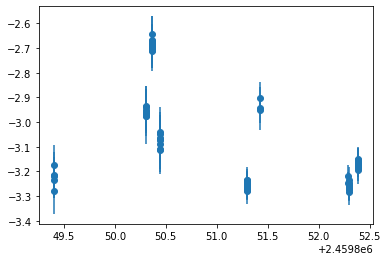

In [4]:
# Plotting

average_mag = np.sum([mag_A,mag_B,mag_C], axis=0)/3.
black_mag = mag_GOCYG-average_mag

plt.errorbar(epoch, black_mag, yerr=errors, fmt="o")

**Periodogram**

0.7153138168111532
0.7145863935362959
0.7196229361895337
1.1389705815173345e-34


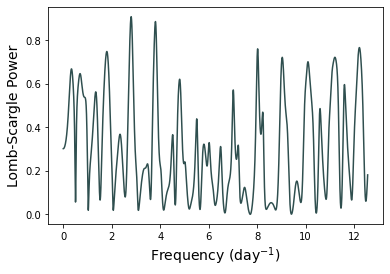

In [7]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(epoch, black_mag, errors, fit_mean=True).autopower(nyquist_factor=1, samples_per_peak=10)
frequency_max, power_max = LombScargle(epoch, black_mag, errors, fit_mean=True).autopower(nyquist_factor=1, samples_per_peak=5)
frequency_min, power_min = LombScargle(epoch, black_mag, errors, fit_mean=True).autopower(nyquist_factor=1, samples_per_peak=1000)

plt.plot(frequency_min, power_min, color='darkslategray')
#plt.title('Lomb-Scargle Periodogram for GO CYG (Clear)', fontsize=14)
plt.xlabel('Frequency (day$^{-1})$', fontsize=14)
plt.ylabel('Lomb-Scargle Power', fontsize=14)

best_frequency = frequency[np.argmax(power)]
best_frequency_max = frequency[np.argmax(power_max)]
best_frequency_min = frequency_min[np.argmax(power_min)]
best_frequencies_max = frequency_max[np.argpartition(power_max, -3)[-3:]]
best_frequencies_min = frequency_min[np.argpartition(power_min, -3)[-3:]]

print(2/best_frequency)
print(2/best_frequency_min)
print(1/best_frequency_max)

ls = LombScargle(epoch, black_mag, errors, fit_mean=True)
print(ls.false_alarm_probability(power.max()) )

**Converting Time to Phase**

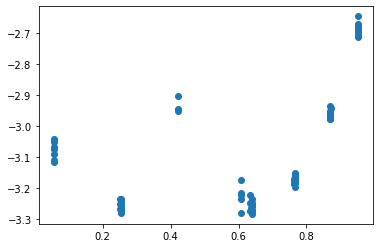

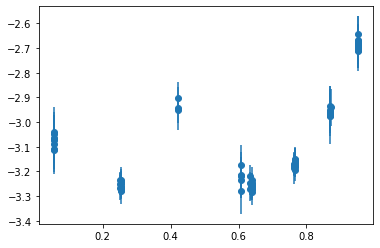

In [ ]:
period = 0.7177646 # days

phase = []
for time in epoch:
  time_since_eclipse = time - 2459848.96655
  while (time_since_eclipse / period) > 1:
    time_since_eclipse -= period
  phase.append(time_since_eclipse / period)

plt.scatter(phase, black_mag)
plt.show()
plt.errorbar(phase, black_mag, yerr=errors, fmt="o")
plt.show()


**Fitting Light Curves**

array([ 21.55, -17.  , -23.81,   7.26,   2.48])

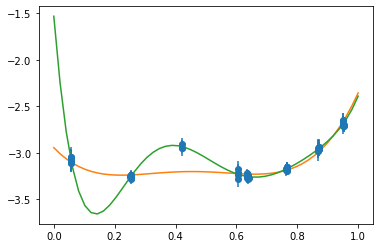

In [ ]:
t_fit = np.linspace(0, 1)
ls2 = LombScargle(phase, black_mag, errors, fit_mean=True, nterms=2)
ls3 = LombScargle(phase, black_mag, errors, fit_mean=True, nterms=3)
y_fit2 = ls2.model(t_fit, 1/(2*math.pi*period))
y_fit3 = ls3.model(t_fit, 1/(2*math.pi*period))

#plt.scatter(phase, black_mag-0.5)
plt.errorbar(phase, black_mag, errors, fmt='o')
plt.plot(t_fit, y_fit2)
plt.plot(t_fit, y_fit3)

theta = ls2.model_parameters(1/(2*math.pi*period))
theta.round(2)

**Stacking Data Points**

In [ ]:
obs_diff = np.diff(epoch)

stacking = []

stack = 0

for i in range (len(epoch)-1):
  diff = epoch[i+1]-epoch[i]
  if diff < 0.0015:
    stack += 1
  else:
    stacking.append(stack)
    stack = 0

print(stacking)

[4, 9, 9, 7, 13]
